# Writing data to and reading data from a Database using Python

## Libraries and settings

In [30]:
# Libraries
import os
import sqlite3
import fnmatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Function to close a sqlite db-connection
def check_conn(conn):
     try:
        conn.cursor()
        return True
     except Exception as ex:
        return False

# Get current working directory
print(os.getcwd())

/workspaces/data_analytics/Week_02


## Create sqlite data base

In [31]:
# Create data base
conn = sqlite3.connect('apartment_database.db') 
cursor = conn.cursor()

# Show dbs in the directory
flist = fnmatch.filter(os.listdir('.'), '*.db')
for i in flist:
    print(i)

apartment_database.db


## Create SQL-table in the database

In [32]:
cursor.execute('''CREATE TABLE IF NOT EXISTS apartments_table (OrderId VARCHAR(50),
                                                               Adress VARCHAR(200),
                                                               Rooms DECIMAL(8,2),
                                                               Area INT(8),
                                                               Price DECIMAL(8,2))''')
# Confirm changes to the table
conn.commit()

## Read data from file to data frame

In [33]:
df = pd.read_csv('apartments_data_prepared_zh.csv',
                  sep=',', 
                  encoding='utf-8')[['web-scraper-order', 'address_raw', 'rooms', 'area', 'price']]
print(df.shape)
df.head(5)

(1008, 5)


,web-scraper-order,address_raw,rooms,area,price
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",3.0,49.0,1441.0
1,1693998201-2,"Zürcherstrasse 1, 8173 Neerach, ZH",3.5,65.0,1850.0
2,1693998201-3,"Cramerstrasse 8-12, 8004 Zürich, ZH",NaN,NaN,2686.0
3,1693998201-4,"Cramerstrasse 8-12, 8004 Zürich, ZH",2.0,54.0,4853.0
4,1693998201-5,"Rotachstrasse 33, 8003 Zürich, ZH",2.0,49.0,4335.0


## Write data to the SQL-table in data base

In [34]:
df.to_sql(name = 'apartments_table',
          con = conn,
          index = False,
          if_exists = 'replace')

1008

## Query the SQL-table

In [35]:
# Query the SQL-table
cursor.execute('''SELECT *
               FROM apartments_table
               WHERE rooms >=1''')

df = pd.DataFrame(cursor.fetchall(), 
                  columns=['OrderId','Address','Rooms','Area','Price'])    
df

,OrderId,Address,Rooms,Area,Price
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",3.0,49.0,1441.0
1,1693998201-2,"Zürcherstrasse 1, 8173 Neerach, ZH",3.5,65.0,1850.0
2,1693998201-4,"Cramerstrasse 8-12, 8004 Zürich, ZH",2.0,54.0,4853.0
3,1693998201-5,"Rotachstrasse 33, 8003 Zürich, ZH",2.0,49.0,4335.0
4,1693998201-16,"Wolframplatz 1, 8045 Zürich, ZH",2.0,32.0,3515.0
...,...,...,...,...,...
958,1693998381-1004,"Hölderlinstrasse 12, 8032 Zürich, ZH",3.5,82.0,2830.0
959,1693998381-1005,"Hegifeldstrasse 70, 8404 Reutlingen (Winterthu...",4.0,73.0,1713.0
960,1693998381-1006,"Holzmoosrütisteig 2b, 8820 Wädenswil, ZH",4.5,110.0,3500.0
961,1693998381-1007,"Vogelbuckstrasse 25, 8307 Effretikon, ZH",3.0,68.0,1650.0


## Plot histogramm of rental prices

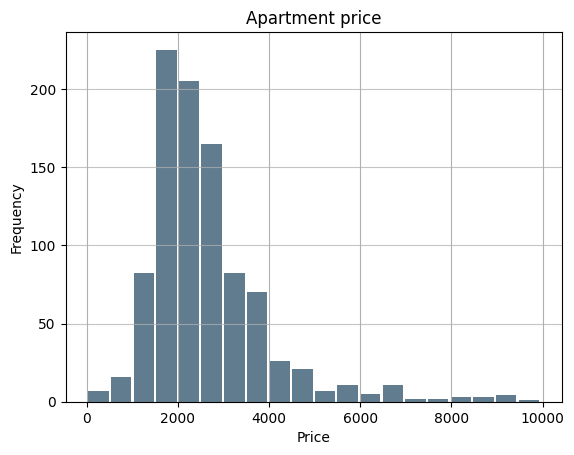

In [36]:
df.Price.plot.hist(grid=True, 
                   bins=20, 
                   rwidth=0.9,
                   color='#607c8e')
plt.title('Apartment price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

## Additional SQL-queries

In [37]:
# SQL query to filter apartments with >= 4.0 rooms and area >= 100m2
query_4_rooms = ('''
    SELECT * 
    FROM apartments_table
    WHERE rooms >= 4.0
    AND area >= 100
''')

# Execute the query and fetch the result
filtered_apartments = pd.read_sql_query(query_4_rooms, conn)

# Display the result with a title
print("Filtered Apartments: Apartments with >= 4.0 rooms and area >= 100m2")
display(filtered_apartments.style.set_caption("Filtered Apartments: >= 4 rooms, >= 100m2"))

# SQL query to calculate average price per room size
query_avg_price = ('''
    SELECT rooms, AVG(price) as avg_price
    FROM apartments_table
    GROUP BY rooms
''')

# Execute the query and fetch the result
avg_price_per_room = pd.read_sql_query(query_avg_price, conn)

# Display the result with a title
print("\nAverage Price per Room Size")
display(avg_price_per_room.style.set_caption("Average Price per Room"))

# SQL query to calculate the average area per room size
query_avg_area = '''
    SELECT rooms, AVG(area) as avg_area
    FROM apartments_table
    GROUP BY rooms
'''

# Execute the query and fetch the result
avg_area_per_room = pd.read_sql_query(query_avg_area, conn)

# Display the result with a title
print("\nAverage Area per Room Size")
display(avg_area_per_room.style.set_caption("Average Area per Room"))


Filtered Apartments: Apartments with >= 4.0 rooms and area >= 100m2


,web-scraper-order,address_raw,rooms,area,price
0,1693998205-26,"Frowiesstrasse 36, 8344 Bäretswil, ZH",5.500000,140.000000,2750.000000
1,1693998205-27,"Kanzleistrasse 15, 8418 Schlatt ZH, ZH",4.500000,104.000000,2700.000000
2,1693998205-29,"Bolletweg 14, 8934 Knonau, ZH",5.500000,150.000000,3390.000000
3,1693998205-31,"Adlergass 6, 8805 Richterswil, ZH",5.500000,165.000000,nan
4,1693998205-33,"Haldenstrasse 67, 8602 Wangen b. Dübendorf, ZH",4.500000,118.000000,3390.000000
5,1693998205-36,"Albisriederstrasse 392a, 8047 Zürich, ZH",5.500000,192.000000,4960.000000
6,1693998205-37,"Tisliacherstrasse 8, 8320 Fehraltorf, ZH",5.500000,166.000000,3500.000000
7,1693998205-38,"Buckwiesstrasse 12, 8700 Küsnacht ZH, ZH",5.500000,232.000000,8500.000000
8,1693998205-39,"Binzigerstrasse 52, 8707 Uetikon am See, ZH",6.500000,300.000000,11.000000
9,1693998205-40,"Hinterdorfstr. 4, 8315 Lindau, ZH",4.500000,124.000000,2740.000000



Average Price per Room Size


,rooms,avg_price
0,nan,3250.844444
1,1.000000,1290.311475
2,1.500000,2036.418605
3,2.000000,2133.375000
4,2.500000,2450.907407
5,3.000000,2112.017857
6,3.500000,2643.370968
7,4.000000,2890.257143
8,4.500000,3029.432990
9,5.000000,2993.333333



Average Area per Room Size


,rooms,avg_area
0,nan,nan
1,1.000000,32.092593
2,1.500000,35.526316
3,2.000000,54.428571
4,2.500000,67.317881
5,3.000000,68.980392
6,3.500000,89.858974
7,4.000000,96.129032
8,4.500000,114.779661
9,5.000000,110.000000


## Close db connection (if open)

In [38]:
# Close db connection (if open)
try:
    if check_conn(conn):
        conn.close()
    else:
        pass
except:
    pass

# Status (True = open, False = closed)
print(check_conn(conn))

False


### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [39]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2024-10-02 07:47:23
Python Version: 3.11.10
-----------------------------------
